<b>For Text Mining assignment
 
<b> ONE:
<b>1) Perform sentimental analysis on the Elon-musk tweets (Exlon-musk.csv)


-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

<b><h3>SENTIMENTAL ANALYSIS

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(style='whitegrid')

In [2]:
data = pd.read_csv(r'D:\Excelr Data Science assignment\Text mining\Elon_musk.csv',encoding='latin1')

In [3]:
data

,Unnamed: 0,Text
0,1,@kunalb11 Im an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...
...,...,...
1994,1995,"@flcnhvy True, it sounds so surreal, but the n..."
1995,1996,@PPathole Make sure to read ur terms &amp; con...
1996,1997,@TeslaGong @PPathole Samwise Gamgee
1997,1998,@PPathole Altho Dumb and Dumber is <U+0001F525...


<b>DATA PREPROCESSING

In [4]:
data_2 = data['Text']
data_2 = pd.DataFrame(data_2)
data_2

,Text
0,@kunalb11 Im an alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated
4,@teslacn Congratulations Tesla China for amazi...
...,...
1994,"@flcnhvy True, it sounds so surreal, but the n..."
1995,@PPathole Make sure to read ur terms &amp; con...
1996,@TeslaGong @PPathole Samwise Gamgee
1997,@PPathole Altho Dumb and Dumber is <U+0001F525...


In [5]:
data_2.shape

(1999, 1)

In [6]:
import re

In [7]:
#function to clean junks

def clean_text(tweets):
    tweets = re.sub(r'@\w+','',tweets)
    tweets = re.sub(r'#','',tweets)
    tweets = re.sub(r'^RT\s+@\w+:\s+','',tweets)
    tweets = re.sub(r'https?:\/\/\S+','',tweets)
    tweets = re.sub(r'<U\+[0-9A-F]+>','',tweets)
    tweets = re.sub(r'\n+',' ',tweets)
    
    return tweets

In [8]:
# Apply the function to clean the texts
data_2['Text'] = data_2['Text'].apply(clean_text)

# To see the full text
pd.set_option('display.max_colwidth',None)
data_2

,Text
0,Im an alien
1,Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?
2,Great interview!
3,Doge is underestimated
4,Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!
...,...
1994,"True, it sounds so surreal, but the negative propaganda is still all out there &amp; easy to find in social me"
1995,Make sure to read ur terms &amp; conditions before clicking accept!
1996,Samwise Gamgee
1997,Altho Dumb and Dumber is


In [9]:
#Remove Emojies

from emoji import demojize
demojize(data_2['Text']);
data_2

,Text
0,Im an alien
1,Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?
2,Great interview!
3,Doge is underestimated
4,Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!
...,...
1994,"True, it sounds so surreal, but the negative propaganda is still all out there &amp; easy to find in social me"
1995,Make sure to read ur terms &amp; conditions before clicking accept!
1996,Samwise Gamgee
1997,Altho Dumb and Dumber is


<b><h3>Sentimental analysis using TextBlob

In [10]:
from textblob import TextBlob

In [11]:
#function to return subjecticity and polarity

def get_polarity(tweets):
    return TextBlob(tweets).sentiment.polarity
def get_subjectivity(tweets):
    return TextBlob(tweets).sentiment.subjectivity

data_2['subjectivity_score'] = data_2['Text'].apply(get_subjectivity)
data_2['polarity_score'] = data_2['Text'].apply(get_polarity)
data_2

,Text,subjectivity_score,polarity_score
0,Im an alien,0.750000,-0.250000
1,Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?,0.000000,0.000000
2,Great interview!,0.750000,1.000000
3,Doge is underestimated,0.000000,0.000000
4,Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!,0.366667,0.345313
...,...,...,...
1994,"True, it sounds so surreal, but the negative propaganda is still all out there &amp; easy to find in social me",0.508333,0.111111
1995,Make sure to read ur terms &amp; conditions before clicking accept!,0.888889,0.625000
1996,Samwise Gamgee,0.000000,0.000000
1997,Altho Dumb and Dumber is,0.500000,-0.375000


In [12]:
data_2['subjectivity'] = data_2['subjectivity_score'].map(lambda x: 'neg' if x<0 else 'pos' if x>0 else 'neutral')
data_2['polarity'] = data_2['polarity_score'].map(lambda x: 'neg' if x<0 else 'pos' if x>0 else 'neutral')
data_2

,Text,subjectivity_score,polarity_score,subjectivity,polarity
0,Im an alien,0.750000,-0.250000,pos,neg
1,Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?,0.000000,0.000000,neutral,neutral
2,Great interview!,0.750000,1.000000,pos,pos
3,Doge is underestimated,0.000000,0.000000,neutral,neutral
4,Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!,0.366667,0.345313,pos,pos
...,...,...,...,...,...
1994,"True, it sounds so surreal, but the negative propaganda is still all out there &amp; easy to find in social me",0.508333,0.111111,pos,pos
1995,Make sure to read ur terms &amp; conditions before clicking accept!,0.888889,0.625000,pos,pos
1996,Samwise Gamgee,0.000000,0.000000,neutral,neutral
1997,Altho Dumb and Dumber is,0.500000,-0.375000,pos,neg


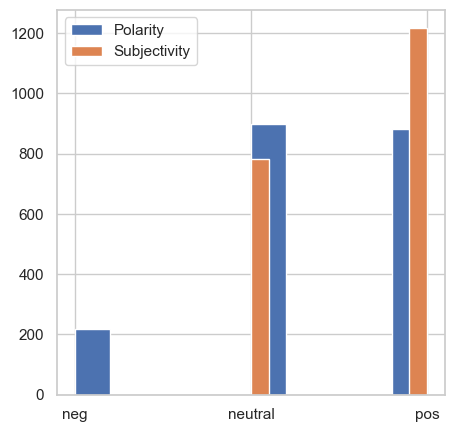

In [13]:
plt.figure(figsize=(5,5))
plt.hist(data_2['polarity'],label='Polarity')
plt.hist(data_2['subjectivity'],label='Subjectivity')
plt.legend(loc='best')
plt.show()

<b>We can see thet majority of the tweets are recognized as neutral and positive .Lets do a scatter plot on it

<Axes: xlabel='polarity_score', ylabel='subjectivity_score'>

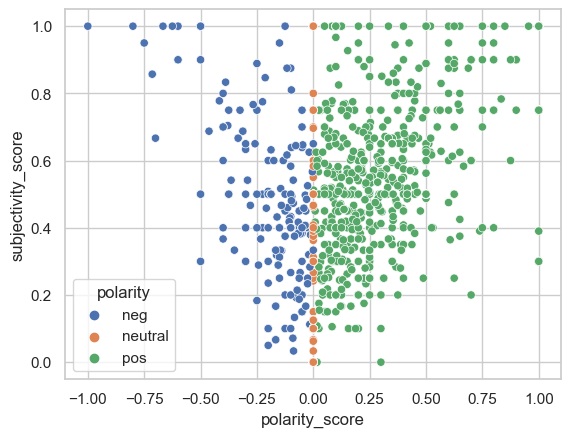

In [14]:
sns.scatterplot(data=data_2,x='polarity_score',y='subjectivity_score',hue='polarity')

<b>Most of the tweets are on the right side of the chart which implies lot more tweets are identified as neutral or positive.

<b>Let's see some comments with extreme positive and negative scores

In [15]:
data_2[data_2['polarity_score']==1]
data_2.iloc[1818,0]

'Another government stimulus package is not in the best interests of the people imo'

<b>The comment seems to be of negative type but it has been detected as +ve since it has a word 'best' in it.

In [16]:
data_2[data_2['polarity_score']==-1]

,Text,subjectivity_score,polarity_score,subjectivity,polarity
1265,It will be very insane,1.0,-1.0,pos,neg


<b>Looks kind of exclamatory or enthusiastic comment which we would expect to be with a neutral score or positive score

In [17]:
data_2[data_2['polarity_score']==0].head()

,Text,subjectivity_score,polarity_score,subjectivity,polarity
1,Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?,0.0,0.0,neutral,neutral
3,Doge is underestimated,0.0,0.0,neutral,neutral
6,"Frodo was the underdoge, All thought he would fail, Himself most of all.",0.4,0.0,pos,neutral
8,Indeed! Tweets definitely do not represent real-world time allocation.,0.5,0.0,pos,neutral
10,Just sent some,0.0,0.0,neutral,neutral


In [18]:
#let's create a piechart of sentiments
data_2['polarity'].value_counts()

polarity
neutral    899
pos        883
neg        217
Name: count, dtype: int64

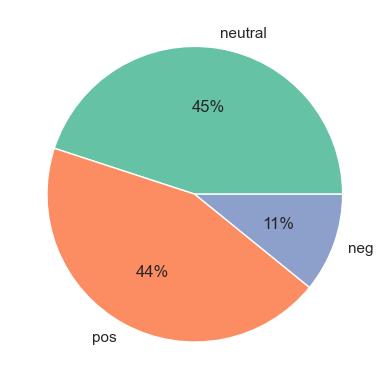

In [19]:
d = data_2['polarity'].value_counts()
plt.pie(x=d,labels=d.index,autopct='%.0f%%',colors=sns.color_palette('Set2'));

<b>Observations from piechart :

<b>45% tweets are Neutral<br>
<b>44% are Positive<br>
<b>11% are Negative

In [20]:
#Most used words in Positive and negative comments
from wordcloud import WordCloud

In [21]:
#Combine all the positive tweets into one text and negative tweets into one
positive_tweets = ' '.join([text for text in data_2['Text'][data_2['polarity']=='pos']])
negative_tweets = ' '.join([text for text in data_2['Text'][data_2['polarity']=='neg']])

In [22]:
#Create WordCloud object
wordcloud = WordCloud(width = 1000, height = 600, random_state=101, max_font_size=100, relative_scaling=0.5,colormap='coolwarm_r')

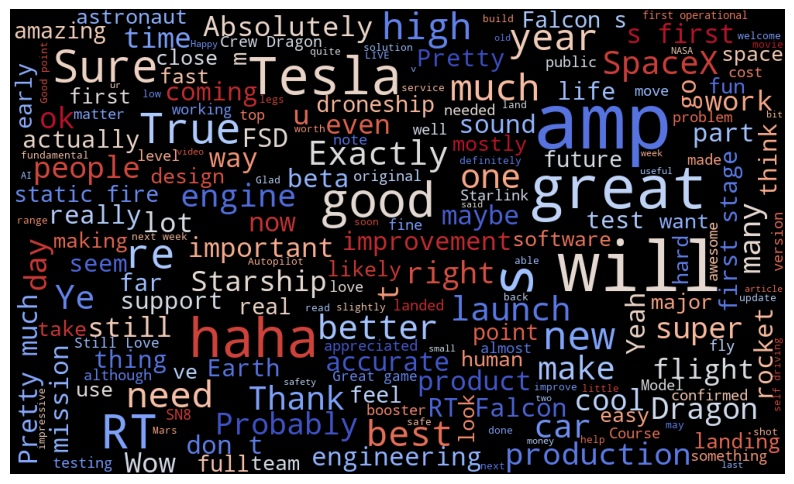

In [23]:
plt.figure(figsize=(10,10))
plt.imshow(wordcloud.generate(positive_tweets))
plt.axis('off')
plt.show()

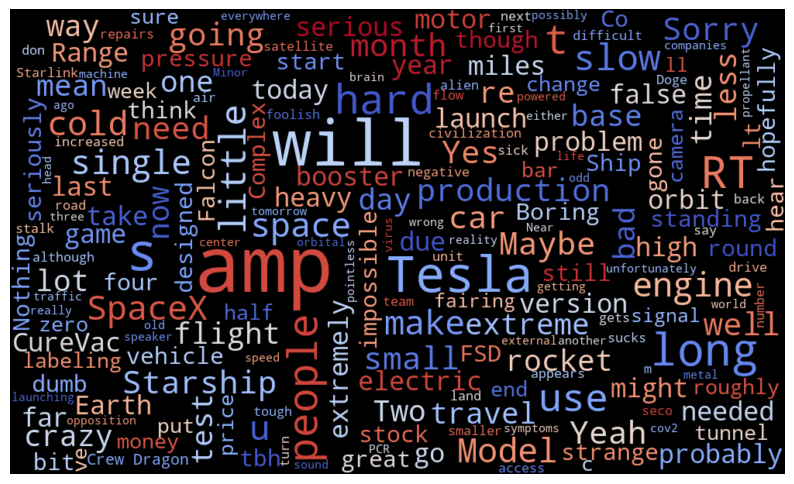

In [24]:
plt.figure(figsize=(10,10))
plt.imshow(wordcloud.generate(negative_tweets),interpolation='bilinear')
plt.axis('off')
plt.show()

<b>We can see common words in positive and negative tweets but there are many negative words like 'hard','bad','false','small','zero' im mosat used negative words

<b><h3>Sentimental analysis using NLTK- SIA

In [25]:
import nltk
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA

In [26]:
#nltk.downloader.download('vader_lexicon')

In [27]:
sia = SIA()
sia.polarity_scores('I Love beaches')

{'neg': 0.0, 'neu': 0.192, 'pos': 0.808, 'compound': 0.6369}

<b>It returns negative,positive,neutral and a compound score

<b>Let's go ahead and apply to the tweets

In [28]:
#function to return the polarity score

def sentiment_SIA(tweets):
    sia = SIA()
    polarity_score = sia.polarity_scores(tweets)
    return 'neg' if polarity_score['compound'] < 0 else 'neu' if polarity_score['compound']==0 else 'pos'

In [29]:
data_2['polarity_sia'] = data_2['Text'].apply(sentiment_SIA)
data_2

,Text,subjectivity_score,polarity_score,subjectivity,polarity,polarity_sia
0,Im an alien,0.750000,-0.250000,pos,neg,neu
1,Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?,0.000000,0.000000,neutral,neutral,neu
2,Great interview!,0.750000,1.000000,pos,pos,pos
3,Doge is underestimated,0.000000,0.000000,neutral,neutral,neg
4,Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!,0.366667,0.345313,pos,pos,pos
...,...,...,...,...,...,...
1994,"True, it sounds so surreal, but the negative propaganda is still all out there &amp; easy to find in social me",0.508333,0.111111,pos,pos,neg
1995,Make sure to read ur terms &amp; conditions before clicking accept!,0.888889,0.625000,pos,pos,pos
1996,Samwise Gamgee,0.000000,0.000000,neutral,neutral,neu
1997,Altho Dumb and Dumber is,0.500000,-0.375000,pos,neg,neg


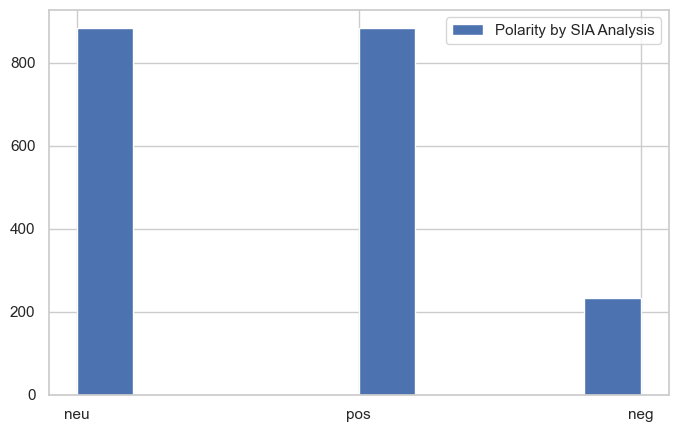

In [30]:
#Plot of SIA
plt.figure(figsize=(8,5))
plt.hist(data_2['polarity_sia'],label='Polarity by SIA Analysis')
plt.legend(loc='best')
plt.show()

<b>Almost 90% tweets are treated as positive

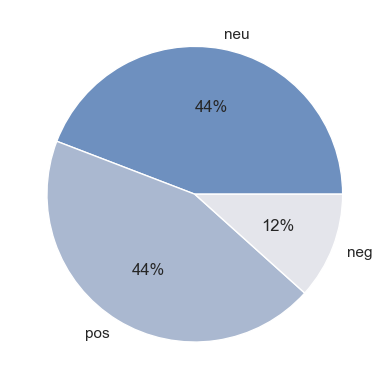

In [31]:
#Pieplot of SIA Polarity
d2 = data_2['polarity_sia'].value_counts()
plt.pie(x=d2,labels=d2.index,autopct='%.0f%%',colors=sns.color_palette('vlag'));

<b>We get 44% of positive and neutral tweets and 12% negative with SIA

In [32]:
#Most used words in Positive and negative comments
#Combine all the positive tweets into one text and negative tweets into one

positive_tweets_2 = ' '.join([text for text in data_2['Text'][data_2['polarity_sia']=='pos']])
negative_tweets_2 = ' '.join([text for text in data_2['Text'][data_2['polarity_sia']=='neg']])

In [33]:
wordcloud_2 = WordCloud(width=1000, height= 600,random_state=102 ,max_font_size=100, relative_scaling=0.5, colormap='twilight_shifted_r')

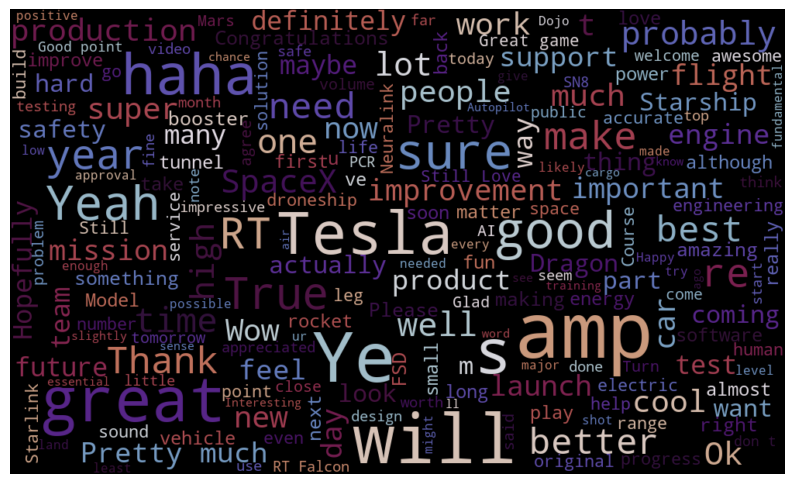

In [34]:
plt.figure(figsize=(10,10))
plt.imshow(wordcloud_2.generate(positive_tweets_2),interpolation='bilinear')
plt.axis('off')
plt.show()

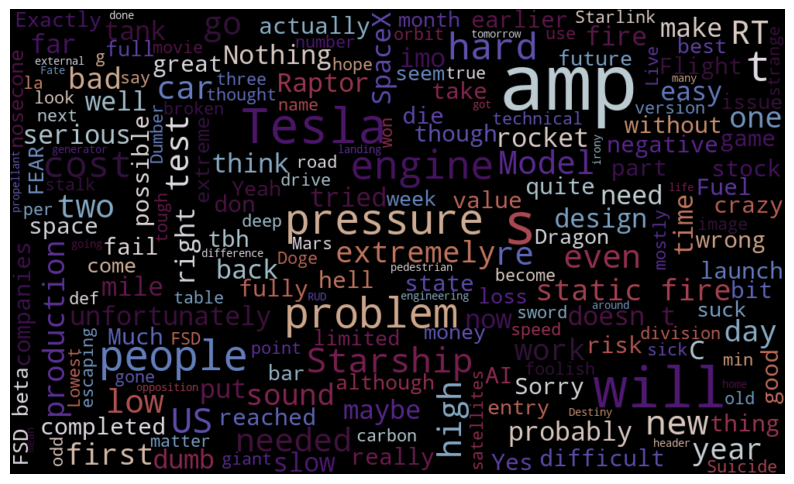

In [35]:
plt.figure(figsize=(10,10))
plt.imshow(wordcloud_2.generate(negative_tweets_2),interpolation='bilinear')
plt.axis('off')
plt.show()

<b>Conclusion


<b>1.As per TextBlob Elon Musk's tweets are more on a subjective side than neutral. 44% of the tweets are identified as positive tweets and 11% as negative where as by using NLTK's SIA 44% are recognized as positive tweets and 12% as negative.Which indicates that both models give almost equal results

<b>2.In both positive and negative tweets 'amp','Tesla' and 'will' are most common words

<b>3.The subjectivity of the tweets were found below average

-----------------------------------------------------------------------------------------------------------------------------------------------------------------